[View in Colaboratory](https://colab.research.google.com/github/pskshyam/SelfOrganizedMaps/blob/master/FraudDetection_HybridDeepLearning.ipynb)

In [1]:
#Upload the data file into Colab
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Credit_Card_Applications.csv to Credit_Card_Applications.csv
User uploaded file "Credit_Card_Applications.csv" with length 35641 bytes


**UnSupervised Model**

In [0]:
#Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell #To print multiple outputs
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
#Import the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [0]:
#Create subsets of data
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values #We are not goign to use this. This is just to distinguish between the customers who are approved and who are not.

In [4]:
print(X[0:5])

[[1.5776156e+07 1.0000000e+00 2.2080000e+01 1.1460000e+01 2.0000000e+00
  4.0000000e+00 4.0000000e+00 1.5850000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 1.0000000e+02 1.2130000e+03]
 [1.5739548e+07 0.0000000e+00 2.2670000e+01 7.0000000e+00 2.0000000e+00
  8.0000000e+00 4.0000000e+00 1.6500000e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 1.6000000e+02 1.0000000e+00]
 [1.5662854e+07 0.0000000e+00 2.9580000e+01 1.7500000e+00 1.0000000e+00
  4.0000000e+00 4.0000000e+00 1.2500000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 2.8000000e+02 1.0000000e+00]
 [1.5687688e+07 0.0000000e+00 2.1670000e+01 1.1500000e+01 1.0000000e+00
  5.0000000e+00 3.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00
  1.1000000e+01 1.0000000e+00 2.0000000e+00 0.0000000e+00 1.0000000e+00]
 [1.5715750e+07 1.0000000e+00 2.0170000e+01 8.1700000e+00 2.0000000e+00
  6.0000000e+00 4.0000000e+00 1.9600000e+00 1.0000000e+00 1.

In [5]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
X[0:5]

array([[0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
        0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
        0.        , 1.        , 0.5       , 0.05      , 0.01212   ],
       [0.69609056, 0.        , 0.13413534, 0.25      , 0.5       ,
        0.53846154, 0.375     , 0.00578947, 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.08      , 0.        ],
       [0.38898166, 0.        , 0.23804511, 0.0625    , 0.        ,
        0.23076923, 0.375     , 0.04385965, 0.        , 0.        ,
        0.        , 1.        , 0.5       , 0.14      , 0.        ],
       [0.48842545, 0.        , 0.11909774, 0.41071429, 0.        ,
        0.30769231, 0.25      , 0.        , 1.        , 1.        ,
        0.1641791 , 1.        , 0.5       , 0.        , 0.        ],
       [0.60079526, 1.        , 0.09654135, 0.29178571, 0.5       ,
        0.38461538, 0.375     , 0.06877193, 1.        , 1.        ,
        0.20895522, 0.        , 0.5       , 

In [8]:
!pip install minisom

  Running setup.py bdist_wheel for minisom ... - done
  Stored in directory: /content/.cache/pip/wheels/bf/41/74/f249faec59290949ed0f67953dadb616efc3e6860c9dcba454
Successfully built minisom


In [0]:
#Initializing the SOM
from minisom import MiniSom
som = MiniSom(10, 10, 15, 1.0, 0.5)

In [0]:
#Initialize weights and train the SOM
som.random_weights_init(X)
som.train_random(X, 100)

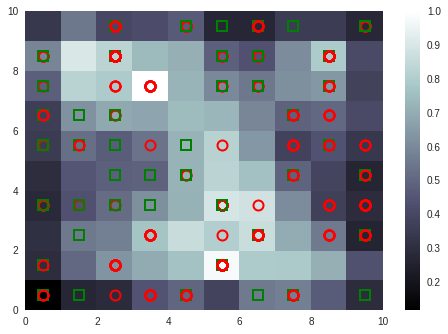

In [9]:
#Plot the SOM
from pylab import bone, pcolor, colorbar, plot, show
bone() #initialize the map window
pcolor(som.distance_map().T) #Take transpose of MID matrix and color plot of the map
colorbar() #gives legend of all the colors
markers = ['o','s'] #add markers
colors = ['r', 'g'] #red squares did not get approval, green circles got approval
#loop through each customer and mark the fraudsters
for i, x in enumerate(X): #i indicates all indexes of customers and X is all vectors of customers
  w = som.winner(x) #get the winning node
  plot(w[0] + 0.5,
       w[1] + 0.5,
      markers[y[i]],
      markeredgecolor = colors[y[i]],
      markerfacecolor = 'None',
      markersize = 10,
      markeredgewidth = 2) #plot the color marker in the center of the winning node
show()

In [10]:
#Get the mappings
mappings = som.win_map(X) #returns a dictionary of all the mappings from winning nodes to customers
mappings

defaultdict(list,
            {(0,
              0): [array([0.48842545, 0.        , 0.11909774, 0.41071429, 0.        ,
                     0.30769231, 0.25      , 0.        , 1.        , 1.        ,
                     0.1641791 , 1.        , 0.5       , 0.        , 0.        ]), array([2.91900420e-01, 0.00000000e+00, 6.31578947e-01, 2.52857143e-01,
                     5.00000000e-01, 2.30769231e-01, 8.75000000e-01, 2.36842105e-01,
                     1.00000000e+00, 1.00000000e+00, 4.47761194e-02, 1.00000000e+00,
                     5.00000000e-01, 5.00000000e-02, 5.00000000e-04]), array([0.41230694, 0.        , 0.50631579, 0.10714286, 0.5       ,
                     1.        , 0.375     , 0.48684211, 1.        , 1.        ,
                     0.02985075, 1.        , 0.5       , 0.2595    , 0.01704   ]), array([0.22236104, 0.        , 0.07774436, 0.33035714, 0.        ,
                     0.53846154, 0.375     , 0.03508772, 1.        , 1.        ,
                     0.0

In [11]:
#Finding the frauds
frauds = np.concatenate((mappings[(5,1)], mappings[(3,7)]), axis = 0)
frauds

array([[6.96090562e-01, 0.00000000e+00, 1.34135338e-01, 2.50000000e-01,
        5.00000000e-01, 5.38461538e-01, 3.75000000e-01, 5.78947368e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [5.37082197e-01, 0.00000000e+00, 2.16842105e-01, 2.08928571e-02,
        5.00000000e-01, 3.84615385e-01, 3.75000000e-01, 1.40350877e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-01, 1.30000000e-01, 1.00400000e-02],
       [3.29777479e-01, 0.00000000e+00, 1.61654135e-01, 6.25000000e-02,
        0.00000000e+00, 5.38461538e-01, 3.75000000e-01, 5.78947368e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-01, 6.60000000e-02, 0.00000000e+00],
       [6.64208001e-01, 0.00000000e+00, 2.36842105e-01, 7.14285714e-02,
        0.00000000e+00, 6.92307692e-01, 8.75000000e-01, 7.01754386e-02,
        0.00000000e+00, 0.00000000e+0

In [12]:
#Inverse scaling to get fraud customers list
frauds = sc.inverse_transform(frauds)
frauds

array([[1.5739548e+07, 0.0000000e+00, 2.2670000e+01, 7.0000000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.6500000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.6000000e+02, 1.0000000e+00],
       [1.5699839e+07, 0.0000000e+00, 2.8170000e+01, 5.8500000e-01,
        2.0000000e+00, 6.0000000e+00, 4.0000000e+00, 4.0000000e-02,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.6000000e+02, 1.0050000e+03],
       [1.5648069e+07, 0.0000000e+00, 2.4500000e+01, 1.7500000e+00,
        1.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.6500000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.3200000e+02, 1.0000000e+00],
       [1.5731586e+07, 0.0000000e+00, 2.9500000e+01, 2.0000000e+00,
        1.0000000e+00, 1.0000000e+01, 8.0000000e+00, 2.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00,

In [13]:
len(frauds)

43

**Going from Unsupervised to Supervised Deep Learning**

In [0]:
#Creating the matrix of features
customers = dataset.iloc[:, 1:].values

In [0]:
#Creating the dependent variable
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i, 0] in frauds:
    is_fraud[i] = 1

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [17]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
# Fitting the ANN to the Training set
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 2, verbose = 2)

Epoch 1/2
 - 4s - loss: 0.4883 - acc: 0.9348
Epoch 2/2
 - 3s - loss: 0.2376 - acc: 0.9377


In [0]:
# Predicting the probabilities of fraud
y_pred = classifier.predict(customers)

In [22]:
#Conatenate customerID to the prediction values
y_pred = np.concatenate([dataset.iloc[:,0:1].values, y_pred], axis = 1)
#instead of iloc[:,0], by using iloc[:,0:1] makes it 2 dimensional because y_pred is 2D array so we have to make sure to do concatenation with same dimensions
y_pred

array([[1.57761560e+07, 9.23738852e-02],
       [1.57395480e+07, 2.59565145e-01],
       [1.56628540e+07, 2.35934302e-01],
       ...,
       [1.56754500e+07, 8.95422995e-02],
       [1.57764940e+07, 2.76555084e-02],
       [1.55924120e+07, 8.43768939e-02]])

In [0]:
#Sort the predicted probabilities for ranking
y_pred = y_pred[y_pred[:,1].argsort()]

In [24]:
y_pred

array([[1.57238270e+07, 5.93121583e-03],
       [1.56674600e+07, 6.51087286e-03],
       [1.56548590e+07, 6.57021953e-03],
       ...,
       [1.56114090e+07, 3.36742938e-01],
       [1.57523440e+07, 3.36742938e-01],
       [1.56089160e+07, 3.36742938e-01]])